In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("27-mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


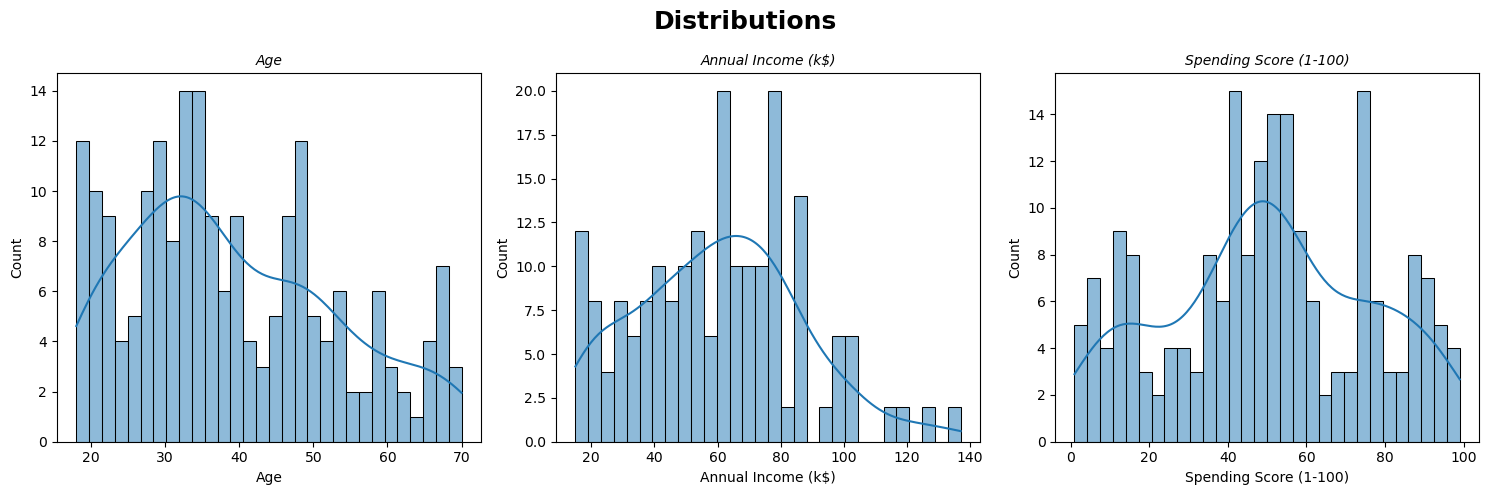

In [6]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [7]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
df = df.drop("CustomerID", axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
df = pd.DataFrame(df_scaled, columns=df.columns)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


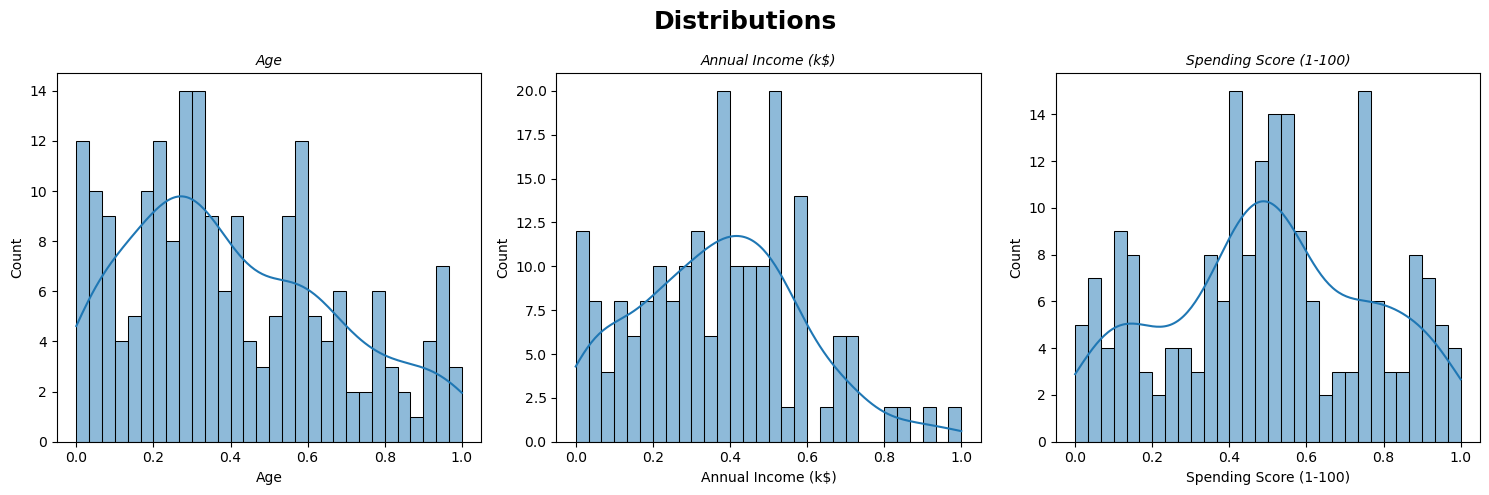

In [13]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [14]:
import scipy.cluster.hierarchy as sch

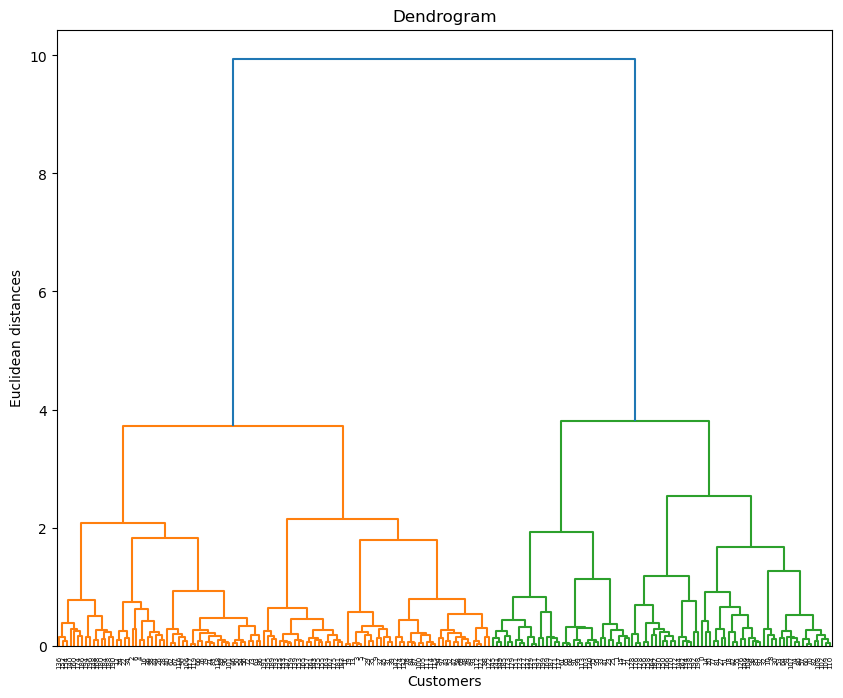

In [15]:
plt.figure(1, figsize = (10 ,8))
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
# we can clearly select 4 to 6 clusters from here. let's choose 4

In [17]:
from sklearn.cluster import AgglomerativeClustering 

In [18]:
hc = AgglomerativeClustering(n_clusters = 4, linkage ='ward')

y_hc = hc.fit_predict(df)

In [19]:
y_hc

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [20]:
df['cluster'] = pd.DataFrame(y_hc)

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


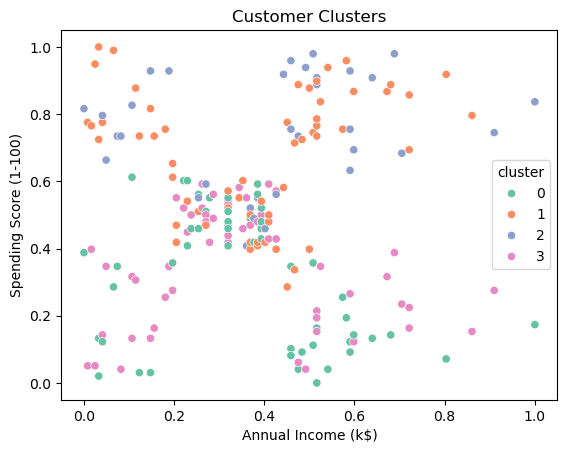

In [22]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set2')
plt.title('Customer Clusters')
plt.show()

In [23]:
# it does not look good on the graph, maybe we cannot visualize it properly
# maybe it doesn't do a good job. let's try to see silhouette_score
from sklearn.metrics import silhouette_score

score = silhouette_score(df, y_hc)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7144


In [24]:
# i will try this with only income and spending score to see if we get a better score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [25]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X)
X['cluster'] = y_hc

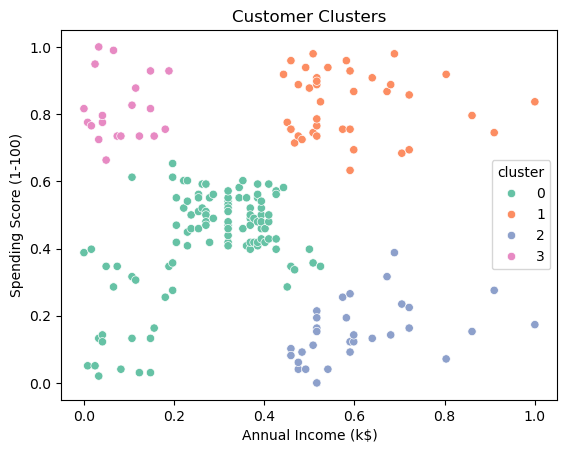

In [26]:
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set2')
plt.title('Customer Clusters')
plt.show()

In [27]:
score = silhouette_score(X, y_hc)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.8219


In [28]:
# it seems like reducing the features increases the score, let's automate this and try from scratch
# you can also try the code below with different # of clusters so you can see the effect clearly

In [29]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis=1)
label_encoder = LabelEncoder() 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

features_2d = ['Annual Income (k$)', 'Spending Score (1-100)']
features_3d = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
features_4d = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']

for feats in [features_2d, features_3d, features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    print(f"\nFeatures: {feats}")
    print(f"Silhouette Score       : {sil:.4f}")
    print(f"Davies-Bouldin Index   : {db:.4f}")
    print(f"Calinski-Harabasz Index: {ch:.2f}")


Features: ['Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score       : 0.5583
Davies-Bouldin Index   : 0.5735
Calinski-Harabasz Index: 258.97

Features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
Silhouette Score       : 0.3955
Davies-Bouldin Index   : 0.8746
Calinski-Harabasz Index: 123.99

Features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']
Silhouette Score       : 0.3503
Davies-Bouldin Index   : 1.0942
Calinski-Harabasz Index: 163.47


In [30]:
# let's try the same data with KMeans and see if we can get a good score
from sklearn.cluster import KMeans

df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis=1)
label_encoder = LabelEncoder() 
df['Gender'] = label_encoder.fit_transform(df['Gender'])


features_list = [
    ['Annual Income (k$)', 'Spending Score (1-100)'],  # 2D
    ['Annual Income (k$)', 'Spending Score (1-100)', 'Age'],  # 3D
    ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']  # 4D
]

for feats in features_list:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
    y_kmeans = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_kmeans)
    db = davies_bouldin_score(X_scaled, y_kmeans)
    ch = calinski_harabasz_score(X_scaled, y_kmeans)

    print(f"\nFeatures: {feats}")
    print(f"Silhouette Score       : {sil:.4f}")
    print(f"Davies-Bouldin Index   : {db:.4f}")
    print(f"Calinski-Harabasz Index: {ch:.2f}")


Features: ['Annual Income (k$)', 'Spending Score (1-100)']
Silhouette Score       : 0.5593
Davies-Bouldin Index   : 0.5616
Calinski-Harabasz Index: 264.55

Features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
Silhouette Score       : 0.4042
Davies-Bouldin Index   : 0.9387
Calinski-Harabasz Index: 125.93

Features: ['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']
Silhouette Score       : 0.3709
Davies-Bouldin Index   : 0.9954
Calinski-Harabasz Index: 172.92
